In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="


In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



In [4]:
city_name = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("Complete")


Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | lorengau
Processing Record 3 of Set 1 | sayat
City not found. Skipping...
Processing Record 4 of Set 1 | odessa
City not found. Skipping...
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | erenhot
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | madhipura
City not found. Skipping...
Processing Record 11 of Set 1 | skjervoy
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | roald
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | mirnyy
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of 

Processing Record 29 of Set 4 | finnsnes
Processing Record 30 of Set 4 | valkeala
Processing Record 31 of Set 4 | pringsewu
Processing Record 32 of Set 4 | plesetsk
Processing Record 33 of Set 4 | kabanjahe
Processing Record 34 of Set 4 | clyde river
Processing Record 35 of Set 4 | yar-sale
Processing Record 36 of Set 4 | rincon de romos
City not found. Skipping...
Processing Record 37 of Set 4 | salalah
Processing Record 38 of Set 4 | gazanjyk
Processing Record 39 of Set 4 | new london
Processing Record 40 of Set 4 | grand forks
Processing Record 41 of Set 4 | kamenka
Processing Record 42 of Set 4 | minab
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | valparaiso
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 4 | znamensk
Processing Record 46 of Set 4 | namie
Processing Record 47 of Set 4 | novobiryusinskiy
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | novoagansk
Processi

Processing Record 13 of Set 8 | amapa
Processing Record 14 of Set 8 | sterling
Processing Record 15 of Set 8 | laguna
Processing Record 16 of Set 8 | makakilo city
Processing Record 17 of Set 8 | svetlogorsk
Processing Record 18 of Set 8 | chardara
Processing Record 19 of Set 8 | tekit
Processing Record 20 of Set 8 | nemuro
Processing Record 21 of Set 8 | haines junction
Processing Record 22 of Set 8 | bure
Processing Record 23 of Set 8 | rusera
Processing Record 24 of Set 8 | maamba
Processing Record 25 of Set 8 | cassilandia
Processing Record 26 of Set 8 | gazojak
Processing Record 27 of Set 8 | jinchang
Processing Record 28 of Set 8 | southbridge
Processing Record 29 of Set 8 | taltal
Processing Record 30 of Set 8 | derzhavinsk
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | chara
Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | kolosovka
Processing Record 35 of Set 8 | salmas
Processing Record 36 of Set 8 | kabo
Processing Record 37 o

In [5]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":countries,
    "Date":dates, 
    "Humidity": humidity,
    "Lat":lats, 
    "Lng":lngs, 
    "Max Temp": max_temps,
    "Wind Speed":wind_speeds
}

weather_data = pd.DataFrame(weatherpy_dict)
 
weather_data.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [6]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port elizabeth,100,CD,1579840999,65,-7.03,29.76,77.95,6.31
1,lorengau,3,PG,1579840987,69,-2.02,147.27,84.33,8.48
2,sayat,52,TM,1579840999,93,38.78,63.88,44.60,11.41
3,odessa,10,UA,1579841000,79,46.48,30.73,26.60,6.71
4,severo-kurilsk,84,RU,1579840925,90,50.68,156.12,17.04,14.45


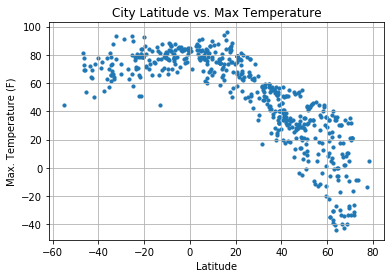

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Max Temp.png")
plt.show()

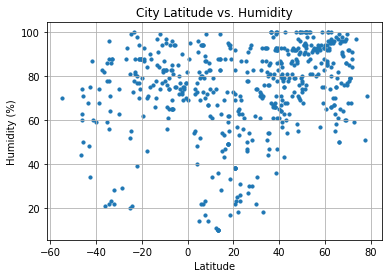

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity.png")
plt.show()

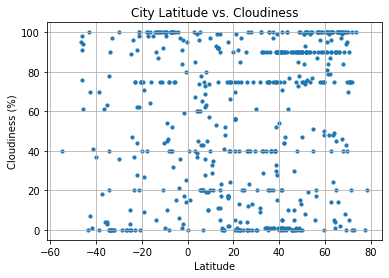

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness.png")
plt.show()

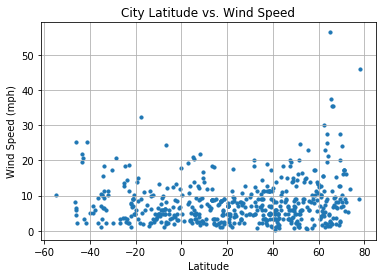

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind Speed.png")
plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

Linear Regression: Strong Negative Correlation


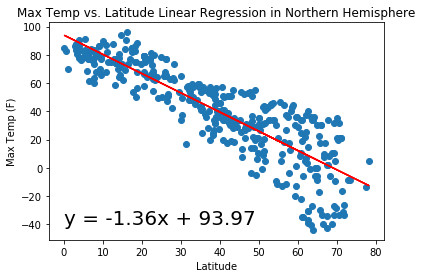

In [12]:
north_lat= northern_hemisphere["Lat"]
north_max= northern_hemisphere["Max Temp"]
#print(f"r-squared:{round(st.pearsonr(north_lat, north_max)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

regress_values= northern_hemisphere["Lat"] * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.title("Max Temp vs. Latitude Linear Regression in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq, (0,-40), fontsize=20, color="black")

print("Linear Regression: Strong Negative Correlation")

Linear Regression: Moderate Correlation


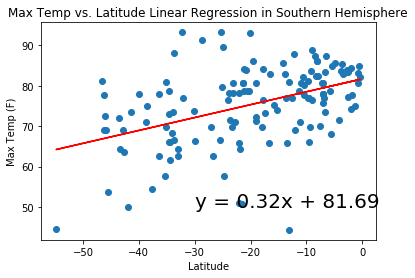

In [13]:
south_lat = southern_hemisphere["Lat"]
south_max = southern_hemisphere["Max Temp"]
#print(f"r-squared: {round(st.pearsonr(south_lat, south_max)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
plt.title("Max Temp vs. Latitude Linear Regression in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=20,color="black")

print("Linear Regression: Moderate Correlation")

Linear Regression: Positive Correlation


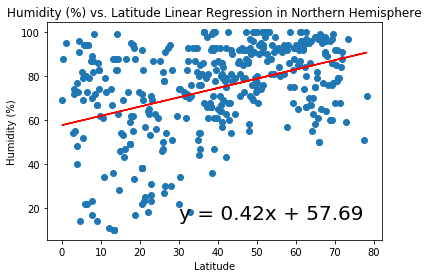

In [14]:
north_humidity = northern_hemisphere["Humidity"]
#print(f"r squared: {round(st.pearsonr(north_lat, north_humidity)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.title("Humidity (%) vs. Latitude Linear Regression in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(30,15),fontsize=20,color="black")

print("Linear Regression: Positive Correlation")

Linear Regression: Moderate Correlation


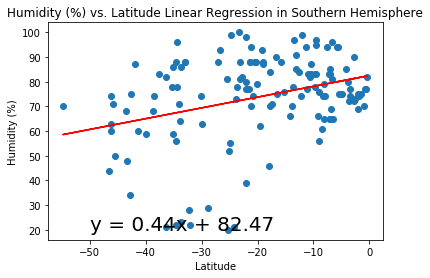

In [15]:
south_humidity = southern_hemisphere["Humidity"]
#print(f"The r-squared is : {round(st.pearsonr(south_lat, south_humidity)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.title("Humidity (%) vs. Latitude Linear Regression in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=20,color="black")

print("Linear Regression: Moderate Correlation")

Linear Regression: No Correlation


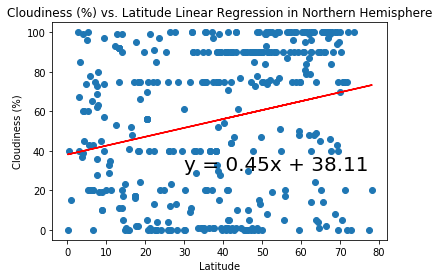

In [16]:
north_cloudiness = northern_hemisphere["Cloudiness"]
#print(f"The r-squared is : {round(st.pearsonr(north_lat, north_cloudiness)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.title("Cloudiness (%) vs. Latitude Linear Regression in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=20,color="black")

print("Linear Regression: No Correlation")

Linear Regression: No Correlation


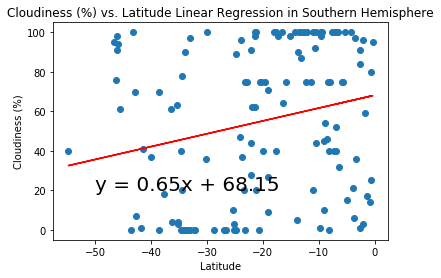

In [17]:
south_cloudiness = southern_hemisphere["Cloudiness"]
#print(f"The r-squared is : {round(st.pearsonr(south_lat, south_cloudiness)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.title("Cloudiness (%) vs. Latitude Linear Regression in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=20,color="black")

print("Linear Regression: No Correlation")

Linear Regression: No Correlation


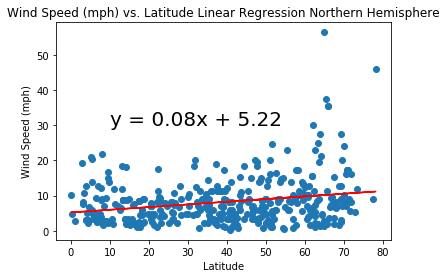

In [18]:
north_wind = northern_hemisphere["Wind Speed"]
#print(f"The r-squared is : {round(st.pearsonr(north_lat, north_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.title("Wind Speed (mph) vs. Latitude Linear Regression Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=20,color="black")

print("Linear Regression: No Correlation")

Linear Regression: No Correlation


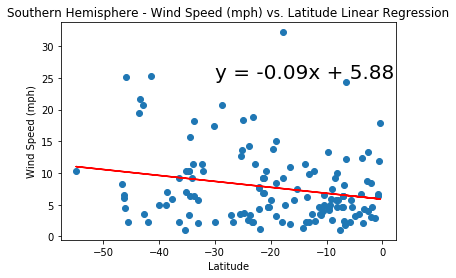

In [19]:
south_wind = southern_hemisphere["Wind Speed"]
#print(f"The r-squared is : {round(st.pearsonr(south_lat, south_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=20,color="black")

print("Linear Regression: No Correlation")